In [23]:
import pandas as pd
import numpy as np
from scipy import linalg as sp_linalg

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'


pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [24]:
df_new = pd.read_csv('./data/공공자전거 대여이력_2021.05.csv', encoding='cp949')
df_new.head()

,자전거번호,대여일시,대여대여소번호,대여대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
0,SPB-51372,2021-04-30 23:13:46,605,신설동역8번출구,0,2021-05-01 00:00:03,4710,자교교회 앞,0,46,6234.92
1,SPB-51159,2021-04-30 23:52:51,2277,길마중4교 하부,0,2021-05-01 00:00:04,2525,반포쇼핑타운 2동 앞,0,7,1660.90
2,SPB-32374,2021-04-30 23:52:31,703,오목교역 7번출구 앞,0,2021-05-01 00:00:04,796,목동아파트 14단지 B상가 앞,0,7,1377.78
3,SPB-39733,2021-04-30 23:50:46,1721,창동역 2번출구,0,2021-05-01 00:00:05,1690,도봉운전면허시험장,0,9,1404.03
4,SPB-81816,2021-04-30 23:51:57,1351,안암2교 옆,99,2021-05-01 00:00:05,378,청계7가 사거리,99,8,1770.00


In [25]:
df_new.replace({'천호역4번출구(?測鍮蓉?점)' : '천호역4번출구(현대백화점)', 
                '천호역4번출구(현대백??점)' : '천호역4번출구(현대백화점)', 
                '뚝섬유원지??1번출구 앞' : '뚝섬유원지역 1번출구 앞', 
                '?떠爭し玲?2번 출구' : '마곡나루역 2번 출구', 
                '신도림역 1번 ?瘦?앞' : '신도림역 1번 출구 앞',
                '장한평역 1?萍瘦?(국민은행앞)' : '장한평역 1번출구 (국민은행앞)', 
                '흑석??1번출구' : '흑석역 1번출구', 
                '안암로터리 버?봐ㅇ昰?앞' : '안암로터리 버스정류장 앞', 
                '롯데월드타워(잠실역2번출구 ??' : '롯데월드타워(잠실역2번출구 쪽)', 
                '목동역5번출구 교통정?맑씽?앞' : '목동역5번출구 교통정보센터 앞', 
                '?㈏풍し玲?1번출구 앞' : '여의나루역 1번출구 앞', 
                '여의나?玲?1번출구 앞' : '여의나루역 1번출구 앞'}, inplace = True)

In [26]:
df_new = df_new.drop(['자전거번호', '대여거치대', '반납거치대', '이용거리'], axis = 1)
df_new.head()

,대여일시,대여대여소번호,대여대여소명,반납일시,반납대여소번호,반납대여소명,이용시간
0,2021-04-30 23:13:46,605,신설동역8번출구,2021-05-01 00:00:03,4710,자교교회 앞,46
1,2021-04-30 23:52:51,2277,길마중4교 하부,2021-05-01 00:00:04,2525,반포쇼핑타운 2동 앞,7
2,2021-04-30 23:52:31,703,오목교역 7번출구 앞,2021-05-01 00:00:04,796,목동아파트 14단지 B상가 앞,7
3,2021-04-30 23:50:46,1721,창동역 2번출구,2021-05-01 00:00:05,1690,도봉운전면허시험장,9
4,2021-04-30 23:51:57,1351,안암2교 옆,2021-05-01 00:00:05,378,청계7가 사거리,8


In [27]:
df_new['대여일시'] = pd.to_datetime(df_new['대여일시'])
df_new['반납일시'] = pd.to_datetime(df_new['반납일시'])

df_new['대여월'] = df_new['대여일시'].dt.month
df_new['대여일'] = df_new['대여일시'].dt.day
df_new['대여요일'] = df_new['대여일시'].dt.dayofweek
df_new['대여시간'] = df_new['대여일시'].dt.hour
df_new['대여시간_분'] = df_new['대여일시'].dt.minute

df_new['반납월'] = df_new['반납일시'].dt.month
df_new['반납일'] = df_new['반납일시'].dt.day
df_new['반납요일'] = df_new['반납일시'].dt.dayofweek
df_new['반납시간'] = df_new['반납일시'].dt.hour
df_new['반납시간_분'] = df_new['반납일시'].dt.minute

In [28]:
df_new = df_new.sort_values('대여일시', ignore_index = True)
df_new.head()

,대여일시,대여대여소번호,대여대여소명,반납일시,반납대여소번호,반납대여소명,이용시간,대여월,대여일,대여요일,대여시간,대여시간_분,반납월,반납일,반납요일,반납시간,반납시간_분
0,2021-04-30 12:18:15,4206,광흥창역5번출구,2021-05-01 08:45:32,4206,광흥창역5번출구,1227,4,30,4,12,18,5,1,5,8,45
1,2021-04-30 17:19:11,1751,창원초등학교 교차로,2021-05-01 01:37:26,1751,창원초등학교 교차로,498,4,30,4,17,19,5,1,5,1,37
2,2021-04-30 18:32:00,164,북가좌1동 주민센터,2021-05-01 08:30:34,914,새절역 2번출구,838,4,30,4,18,32,5,1,5,8,30
3,2021-04-30 20:14:27,1149,신방화역환승주차장,2021-05-01 00:18:00,1158,가양역 8번출구,243,4,30,4,20,14,5,1,5,0,18
4,2021-04-30 20:32:18,1611,과기대 입구(우),2021-05-01 00:04:31,1442,(구)신한은행 중랑교지점,212,4,30,4,20,32,5,1,5,0,4


## Rental Data
- $\mu$ = 평균 자전거 대여수

In [29]:
df_rental = df_new[['대여일시', '대여대여소명','대여대여소번호', '대여월', '대여일', '대여요일', '대여시간', '대여시간_분']]
df_rental.reset_index(drop = True, inplace = True)
df_rental.head(20)

,대여일시,대여대여소명,대여대여소번호,대여월,대여일,대여요일,대여시간,대여시간_분
0,2021-04-30 12:18:15,광흥창역5번출구,4206,4,30,4,12,18
1,2021-04-30 17:19:11,창원초등학교 교차로,1751,4,30,4,17,19
2,2021-04-30 18:32:00,북가좌1동 주민센터,164,4,30,4,18,32
3,2021-04-30 20:14:27,신방화역환승주차장,1149,4,30,4,20,14
4,2021-04-30 20:32:18,과기대 입구(우),1611,4,30,4,20,32
5,2021-04-30 20:32:32,구로중학교앞,1916,4,30,4,20,32
6,2021-04-30 20:34:32,중곡 성원APT 앞,553,4,30,4,20,34
7,2021-04-30 20:43:12,염창나들목,3789,4,30,4,20,43
8,2021-04-30 20:48:20,문정 법조단지8,1244,4,30,4,20,48
9,2021-04-30 20:49:33,도봉한신아파트 주변,1770,4,30,4,20,49


In [30]:
df_rental2 = df_rental.groupby(['대여대여소명','대여대여소번호','대여월','대여시간']).size().reset_index().rename(columns = {0 : 'rent_count'})
df_rental2['rent_count'] = df_rental2['rent_count'] / 31
df_rental2['mu_15'] = df_rental2['rent_count'] / 4
df_rental2

,대여대여소명,대여대여소번호,대여월,대여시간,rent_count,mu_15
0,(구)신한은행 중랑교지점,1442,5,0,1.064516,0.266129
1,(구)신한은행 중랑교지점,1442,5,1,1.096774,0.274194
2,(구)신한은행 중랑교지점,1442,5,2,1.000000,0.250000
3,(구)신한은행 중랑교지점,1442,5,3,0.451613,0.112903
4,(구)신한은행 중랑교지점,1442,5,4,0.419355,0.104839
...,...,...,...,...,...,...
56062,힐스테이트에코,2720,5,19,7.806452,1.951613
56063,힐스테이트에코,2720,5,20,7.580645,1.895161
56064,힐스테이트에코,2720,5,21,6.774194,1.693548
56065,힐스테이트에코,2720,5,22,2.903226,0.725806


## Return Data
- $\lambda$ = 평균 자전거 반납수
- c: 최대거치용량

In [31]:
df_return = df_new[['반납일시', '반납대여소명', '반납대여소번호','반납월', '반납일', '반납요일', '반납시간', '반납시간_분']]
df_return.reset_index(drop = True, inplace = True)

df_return.head()

,반납일시,반납대여소명,반납대여소번호,반납월,반납일,반납요일,반납시간,반납시간_분
0,2021-05-01 08:45:32,광흥창역5번출구,4206,5,1,5,8,45
1,2021-05-01 01:37:26,창원초등학교 교차로,1751,5,1,5,1,37
2,2021-05-01 08:30:34,새절역 2번출구,914,5,1,5,8,30
3,2021-05-01 00:18:00,가양역 8번출구,1158,5,1,5,0,18
4,2021-05-01 00:04:31,(구)신한은행 중랑교지점,1442,5,1,5,0,4


In [32]:
df_c = df_return.groupby(['반납대여소명','반납대여소번호','반납월','반납시간']).size().reset_index().rename(columns = {0 : 'return_count'})
df_c['return_count'] = df_c['return_count'] / 31
df_c['lambda15'] = df_c['return_count']/4
df_c.columns = ['대여소명','대여소번호','월','시간','return_count','lambda15']

In [33]:
return_ubound = pd.DataFrame(df_c.groupby(['대여소명','대여소번호'])['return_count'].agg(lambda x : np.floor(np.percentile(x,75)+(np.percentile(x,75)-np.percentile(x,25))*1.5))).reset_index().rename(columns = {'return_count' : 'upperbound'})
return_ubound.head()

,대여소명,대여소번호,upperbound
0,(구)신한은행 중랑교지점,1442,7.0
1,(시립)고덕평생학습관,1070,2.0
2,(재)FITI시험연구원,2724,7.0
3,3호선 매봉역 3번출구앞,2335,5.0
4,419민주묘지 입구사거리,1568,2.0


In [34]:
df_rental2.columns = ['대여소명','대여소번호','월','시간','rent_count','mu_15']
df = pd.merge(df_c, df_rental2, on=['대여소명','대여소번호','월','시간'], how='outer')
df.tail(20)

,대여소명,대여소번호,월,시간,return_count,lambda15,rent_count,mu_15
57245,휘문고교 사거리,3621,5,3,NaN,NaN,0.032258,0.008065
57246,흑석 아크로리버하임(103동),2078,5,1,NaN,NaN,0.193548,0.048387
57247,흑석 아크로리버하임(103동),2078,5,6,NaN,NaN,0.225806,0.056452
57248,흑석 아크로리버하임(103동),2078,5,7,NaN,NaN,0.193548,0.048387
57249,흑석동효사정앞,4153,5,3,NaN,NaN,0.129032,0.032258
57250,흑석동효사정앞,4153,5,5,NaN,NaN,0.064516,0.016129
57251,흑석동효사정앞,4153,5,6,NaN,NaN,0.677419,0.169355
57252,흑석동효사정앞,4153,5,8,NaN,NaN,0.483871,0.120968
57253,흑석롯데캐슬에듀포레(107동),2083,5,7,NaN,NaN,0.967742,0.241935
57254,흑석역 1번출구,2025,4,23,NaN,NaN,0.129032,0.032258


In [35]:
stops = df[['대여소명','대여소번호']].drop_duplicates().reset_index(drop=True)
Dayhour = pd.DataFrame({'월':np.repeat(5, 24*len(stops)),'시간':np.repeat(np.arange(24), len(stops))})
stops2 = pd.concat([stops] * 24).reset_index(drop=True)
Dayhour_frame = pd.concat([stops2,Dayhour],axis=1)

In [36]:
df = pd.merge(df,Dayhour_frame, on = ['대여소명','대여소번호','월','시간'],how='outer')
df = pd.merge(df, return_ubound, on=['대여소명','대여소번호'], how='outer')
df.fillna(0, inplace=True)
df.head()

,대여소명,대여소번호,월,시간,return_count,lambda15,rent_count,mu_15,upperbound
0,(구)신한은행 중랑교지점,1442,5,0,2.193548,0.548387,1.064516,0.266129,7.0
1,(구)신한은행 중랑교지점,1442,5,1,1.000000,0.250000,1.096774,0.274194,7.0
2,(구)신한은행 중랑교지점,1442,5,2,0.741935,0.185484,1.000000,0.250000,7.0
3,(구)신한은행 중랑교지점,1442,5,3,0.354839,0.088710,0.451613,0.112903,7.0
4,(구)신한은행 중랑교지점,1442,5,4,0.516129,0.129032,0.419355,0.104839,7.0


In [37]:
def mui(data,t) : 
  return(float(data['mu_15'][(data['시간']==t)]))


def lambdai(data, t) : 
  return(float(data['lambda15'][(data['시간']==t)]))

## Define Stochastic Matrix for the conditioned Probability
- We need to get this conditioned probability defined as below
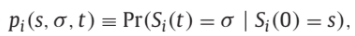
- Conditioned probability and Chapman-Kolmogorov Equations are defined as the picture below
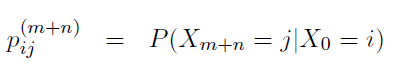
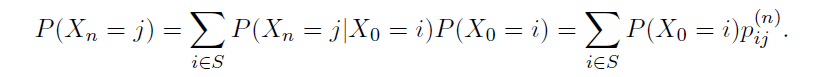

 Then, following the first and second definition & theorem, we can conclude that 
 
 $\ P( S(t) =  \sigma |  S(0) =s)$

= $\ P( S_{t+0} =  \sigma | S_{0} =s)$

= $\ P_{s,\sigma}^ {(t)} $

Thus, we need to get the stochastic matrix for the Markov chain.


### Calculate non conditional probability
To do this, we should first get the probability of each case(non-conditional), defined as below
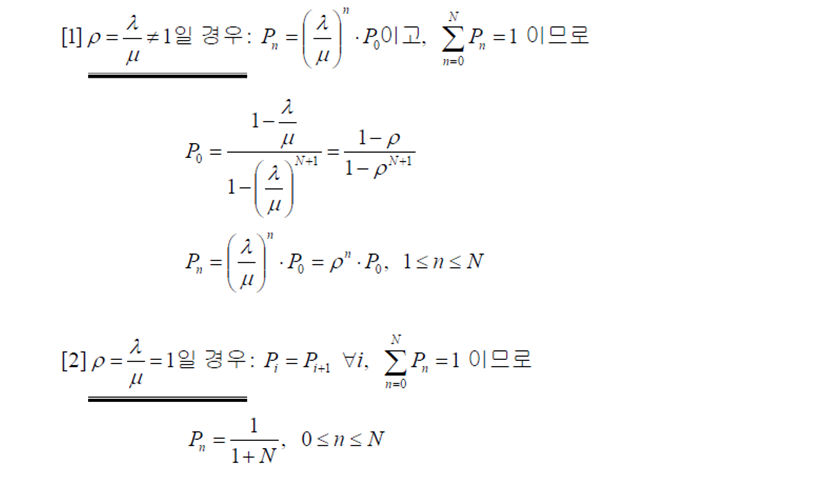


In [39]:
# t시간에 대여소에 s대의 자전거가 있을 확률

def ps(data,t, s) : 
  c = int(data['upperbound'][(data['시간']==1)])
  if mui(data,t) == 0 : 
    rho = 0
  else : 
    rho = lambdai(data,t)/mui(data,t) 
  if rho == 1 :
    p_s = 1/(1+c)
  else : 
    p0 = (1-rho)/(1-rho**(c+1))
    p_s = (rho**s)*p0
  return(p_s)

# 현대고등학교 건너편 대여소로 확인 (최대거치용량 = 17)

In [40]:
data = df[(df['대여소번호']==2301)&(df['월']==5)].reset_index()
data.head()

,index,대여소명,대여소번호,월,시간,return_count,lambda15,rent_count,mu_15,upperbound
0,58190,현대고등학교 건너편,2301,5,0,2.645161,0.661290,2.000000,0.500000,17.0
1,58191,현대고등학교 건너편,2301,5,1,1.193548,0.298387,0.774194,0.193548,17.0
2,58192,현대고등학교 건너편,2301,5,2,0.806452,0.201613,0.806452,0.201613,17.0
3,58193,현대고등학교 건너편,2301,5,3,0.612903,0.153226,0.322581,0.080645,17.0
4,58194,현대고등학교 건너편,2301,5,4,0.193548,0.048387,0.225806,0.056452,17.0


In [41]:
# 8시 => smin = 2, smax = 16

answer = []
for s in range(int(data['upperbound'][(data['시간']==1)])+1):
    answer.append(ps(data, 8, s))     
print(answer)
print(sum(answer))

[4.640083953512331e-08, 1.218022037796987e-07, 3.1973078492170907e-07, 8.392933104194863e-07, 2.2031449398511514e-06, 5.783255467109273e-06, 1.5181045601161841e-05, 3.9850244703049835e-05, 0.00010460689234550582, 0.00027459309240695275, 0.000720806867568251, 0.001892118027366659, 0.00496680982183748, 0.013037875782323384, 0.03422442392859888, 0.08983911281257206, 0.23582767113300168, 0.6190476367241293]
1.0


In [42]:
# 18시 => smin = 3, smax = 15

answer = []
for s in range(int(data['upperbound'][(data['시간']==1)])+1):
    answer.append(ps(data, 18, s))     
print(answer)
print(sum(answer))

[0.024195779955969828, 0.02637507653399021, 0.02875066079455746, 0.031340212228709294, 0.0341630027065838, 0.03724003990186504, 0.04059422363436559, 0.04425051629427381, 0.04823612861639086, 0.052580722186920295, 0.05731663018989928, 0.06247909803610268, 0.06810654566522048, 0.07424085347340433, 0.08092767399410357, 0.08821677165177111, 0.0961623931169422, 0.10482367101893007]
1.0


# 이디야 커피 수유역점 앞 대여소로 확인(최대거치용량 = 10)

In [43]:
data = df[(df['대여소번호']==1503)&(df['월']==5)].reset_index()
data.head()

,index,대여소명,대여소번호,월,시간,return_count,lambda15,rent_count,mu_15,upperbound
0,47597,이디야 커피 수유역점 앞,1503,5,0,2.032258,0.508065,1.870968,0.467742,10.0
1,47598,이디야 커피 수유역점 앞,1503,5,1,1.000000,0.250000,1.290323,0.322581,10.0
2,47599,이디야 커피 수유역점 앞,1503,5,2,1.612903,0.403226,1.451613,0.362903,10.0
3,47600,이디야 커피 수유역점 앞,1503,5,3,0.838710,0.209677,0.838710,0.209677,10.0
4,47601,이디야 커피 수유역점 앞,1503,5,4,0.516129,0.129032,0.645161,0.161290,10.0


In [44]:
# 8시 => smin = 2, smax = 9

answer = []
for s in range(int(data['upperbound'][(data['시간']==1)])+1):
    answer.append(ps(data, 8, s))     
print(answer)
print(sum(answer))

[4.4083271262035513e-07, 1.8537580735830318e-06, 7.795290360708134e-06, 3.27801953629778e-05, 0.00013784492409047073, 0.000579655578226595, 0.0024375260212605534, 0.010250109422736686, 0.04310302423920043, 0.1812537429545864, 0.762195226783389]
1.0


In [45]:
# 18시 => smin = 2, smax = 8

answer = []
for s in range(int(data['upperbound'][(data['시간']==1)])+1):
    answer.append(ps(data, 18, s))     
print(answer)
print(sum(answer))

[0.3280712568226859, 0.2218993290483539, 0.15008724845018115, 0.10151532338539762, 0.06866246792086765, 0.04644160451605611, 0.0314119590416043, 0.021246276503868285, 0.014370458865075961, 0.009719824928158175, 0.006574250517750999]
0.9999999999999998


### Understanding The concept of the Markov chain for the station 

- To get the conditioned probablitiy, a Transition matrix for Markov chain should be defined but yet it's given.
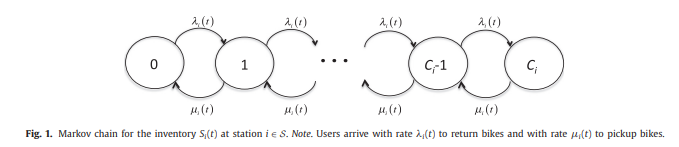

- As above, given thesis clearly mentions that the users arrive with rate $\lambda_i(t)$ to return bikes and with rate $\mu_i(t)$ to pickup bikes.
- This means a Time-inhomogeneous Markovian model of a station i, and hereby the Probability matrix equals Transition Rate matrix in Queueing theory, whose example is below. The first and last rows consists with $\mu$ and $\lambda$ each, and all the diagonal elements are $\lambda$, $-(\lambda+\mu)$ and $\mu$. All the rest elements are 0.
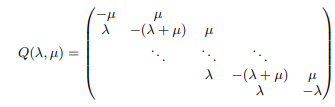

In [46]:
def create_mat(data, t) : 
  c = int(data['upperbound'][(data['시간']==1)])
  if c>=1 : 
    L = np.append([-mui(data,t),mui(data,t)],np.r_[np.tile(np.r_[(np.repeat(0,c-1),lambdai(data,t),-(lambdai(data,t)+mui(data,t)),mui(data,t))],c-1),np.repeat(0,c-1)]).tolist()
    L.append(lambdai(data,t))
    L.append(-lambdai(data,t))
    mat = np.matrix(np.reshape(L,(c+1,c+1)))
  else : 
    L = [0]
    mat = np.matrix(np.reshape(L,(1,1)))
  return(mat)

# 현대고등학교 건너편 대여소로 확인 (최대거치용량 = 17)

In [50]:
data = df[(df['대여소번호']==2301)&(df['월']==5)].reset_index()
data.head()

,index,대여소명,대여소번호,월,시간,return_count,lambda15,rent_count,mu_15,upperbound
0,58190,현대고등학교 건너편,2301,5,0,2.645161,0.661290,2.000000,0.500000,17.0
1,58191,현대고등학교 건너편,2301,5,1,1.193548,0.298387,0.774194,0.193548,17.0
2,58192,현대고등학교 건너편,2301,5,2,0.806452,0.201613,0.806452,0.201613,17.0
3,58193,현대고등학교 건너편,2301,5,3,0.612903,0.153226,0.322581,0.080645,17.0
4,58194,현대고등학교 건너편,2301,5,4,0.193548,0.048387,0.225806,0.056452,17.0


In [48]:
# 8시 => smin = 2, smax = 16

create_mat(data, 8)

matrix([[-0.12903226,  0.12903226,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ],
        [ 0.33870968, -0.46774194,  0.12903226,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.33870968, -0.46774194,  0.12903226,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.33870968, -0.46774194,  0.12903226,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0. 

In [51]:
# 18시 => smin = 3, smax = 15

create_mat(data, 18)

matrix([[-3.49193548,  3.49193548,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ],
        [ 3.80645161, -7.2983871 ,  3.49193548,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ],
        [ 0.        ,  3.80645161, -7.2983871 ,  3.49193548,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  3.80645161, -7.2983871 ,  3.49193548,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0. 

# 이디야 커피 수유역점 앞 대여소로 확인(최대거치용량 = 10)

In [52]:
data = df[(df['대여소번호']==1503)&(df['월']==5)].reset_index()
data.head()

,index,대여소명,대여소번호,월,시간,return_count,lambda15,rent_count,mu_15,upperbound
0,47597,이디야 커피 수유역점 앞,1503,5,0,2.032258,0.508065,1.870968,0.467742,10.0
1,47598,이디야 커피 수유역점 앞,1503,5,1,1.000000,0.250000,1.290323,0.322581,10.0
2,47599,이디야 커피 수유역점 앞,1503,5,2,1.612903,0.403226,1.451613,0.362903,10.0
3,47600,이디야 커피 수유역점 앞,1503,5,3,0.838710,0.209677,0.838710,0.209677,10.0
4,47601,이디야 커피 수유역점 앞,1503,5,4,0.516129,0.129032,0.645161,0.161290,10.0


In [53]:
# 8시 => smin = 2, smax = 9

create_mat(data, 8)

matrix([[-0.31451613,  0.31451613,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ],
        [ 1.32258065, -1.63709677,  0.31451613,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ],
        [ 0.        ,  1.32258065, -1.63709677,  0.31451613,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ],
        [ 0.        ,  0.        ,  1.32258065, -1.63709677,  0.31451613,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ],
        [ 0.        ,  0.        ,  0.        ,  1.32258065, -1.63709677,
          0.31451613,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ,  1.32258065,
         -1.63709677,  0.31451613,  0.        ,  0.        ,  0.       

In [54]:
# 18시 => smin = 2, smax = 8

create_mat(data, 18)

matrix([[-2.49193548,  2.49193548,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ],
        [ 1.68548387, -4.17741935,  2.49193548,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ],
        [ 0.        ,  1.68548387, -4.17741935,  2.49193548,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ],
        [ 0.        ,  0.        ,  1.68548387, -4.17741935,  2.49193548,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ],
        [ 0.        ,  0.        ,  0.        ,  1.68548387, -4.17741935,
          2.49193548,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ,  1.68548387,
         -4.17741935,  2.49193548,  0.        ,  0.        ,  0.       

## $\exp(\int^{t}_{0}Q(x)dx)_{s,\sigma}$ = p_i(s, sigma, t)

In [55]:
def ps_cond(data,t, s, sigma) : 
  mat = create_mat(data,t)
  c = int(data['upperbound'][(data['시간']==1)])
  mat2 = sp_linalg.expm(mat)
  prob = mat2[s,sigma]
  return(prob)

# 현대고등학교 건너편 대여소로 확인 (최대거치용량 = 17)

In [56]:
data = df[(df['대여소번호']==2301)&(df['월']==5)].reset_index()
data.head()

,index,대여소명,대여소번호,월,시간,return_count,lambda15,rent_count,mu_15,upperbound
0,58190,현대고등학교 건너편,2301,5,0,2.645161,0.661290,2.000000,0.500000,17.0
1,58191,현대고등학교 건너편,2301,5,1,1.193548,0.298387,0.774194,0.193548,17.0
2,58192,현대고등학교 건너편,2301,5,2,0.806452,0.201613,0.806452,0.201613,17.0
3,58193,현대고등학교 건너편,2301,5,3,0.612903,0.153226,0.322581,0.080645,17.0
4,58194,현대고등학교 건너편,2301,5,4,0.193548,0.048387,0.225806,0.056452,17.0


In [58]:
# 8시 => smin = 2, smax = 16
# p_i(s, 0, t)

answer = []
for s in range(int(data['upperbound'][(data['시간']==1)])+1):
    answer.append(ps_cond(data, 8, s, 0))
print(answer)
print(sum(answer))

[0.896274737142615, 0.2560709335754677, 0.04079015391751714, 0.004463327873585715, 0.0003708420312197473, 2.4804480700825843e-05, 1.3875755148694967e-06, 6.668369576700184e-08, 2.8083294428394525e-09, 1.052409662057428e-10, 3.552218589465975e-12, 1.0906209199535548e-13, 3.070808860095504e-15, 7.984046516720736e-17, 1.928133087542077e-18, 4.3466583333826246e-20, 9.183379037195701e-22, 1.840328741709718e-23]
1.1979962561975512


In [59]:
# 18시 => smin = 3, smax = 15
# p_i(s, 0, t)

answer = []
for s in range(int(data['upperbound'][(data['시간']==1)])+1):
    answer.append(ps_cond(data, 18, s, 0))
print(answer)
print(sum(answer))

[0.3213512735165115, 0.28327404970936776, 0.21946387881134166, 0.1497641898116888, 0.09048992749319273, 0.0487338550322395, 0.023561430527514308, 0.0102987325780999, 0.004097232680129489, 0.0014928698671432, 0.0005010106253586048, 0.0001556712175032323, 4.499215218826178e-05, 1.2147014378355864e-05, 3.075201542546691e-06, 7.327514512052318e-07, 1.658525072991828e-07, 4.1440854261490215e-08]
1.153245276283013


In [60]:
# 8시 => smin = 2, smax = 16
# p_i(s, c, t)

answer = []
for s in range(int(data['upperbound'][(data['시간']==1)])+1):
    answer.append(ps_cond(data, 8, s, 17))
print(answer)
print(sum(answer))

[1.3794220924344603e-30, 1.784482178055099e-28, 2.2154113903942732e-26, 2.577350023747451e-24, 2.798616008477861e-22, 2.822203163070473e-20, 2.627470307768465e-18, 2.242754030923968e-16, 1.740767655608966e-14, 1.21642594238179e-12, 7.559164358885891e-11, 4.112895196431193e-09, 1.9199393661372677e-07, 7.4799542356943735e-06, 0.00023373551532967737, 0.005505655848235829, 0.08751738143221702, 0.7277211849993641]
0.8209856339330398


In [61]:
# 18시 => smin = 3, smax = 15
# p_i(s, c, t)

answer = []
for s in range(int(data['upperbound'][(data['시간']==1)])+1):
    answer.append(ps_cond(data, 18, s, 17))
print(answer)
print(sum(answer))

[9.565528292911518e-09, 4.086921035911947e-08, 1.9635622090363872e-07, 8.967026434644634e-07, 3.853290248638114e-06, 1.5521973769579273e-05, 5.838376906223865e-05, 0.00020416617627825115, 0.0006605845547896994, 0.001966961980923233, 0.005357885737166014, 0.013262983863857608, 0.0296181340162099, 0.05919166857252833, 0.10495354783628694, 0.1636109244470666, 0.22214864478360336, 0.2602258685907471]
0.8612802730861404


# 이디야 커피 수유역점 앞 대여소로 확인(최대거치용량 = 10)

In [62]:
data = df[(df['대여소번호']==1503)&(df['월']==5)].reset_index()
data.head()

,index,대여소명,대여소번호,월,시간,return_count,lambda15,rent_count,mu_15,upperbound
0,47597,이디야 커피 수유역점 앞,1503,5,0,2.032258,0.508065,1.870968,0.467742,10.0
1,47598,이디야 커피 수유역점 앞,1503,5,1,1.000000,0.250000,1.290323,0.322581,10.0
2,47599,이디야 커피 수유역점 앞,1503,5,2,1.612903,0.403226,1.451613,0.362903,10.0
3,47600,이디야 커피 수유역점 앞,1503,5,3,0.838710,0.209677,0.838710,0.209677,10.0
4,47601,이디야 커피 수유역점 앞,1503,5,4,0.516129,0.129032,0.645161,0.161290,10.0


In [63]:
# 8시 => smin = 2, smax = 9
# p_i(s, 0, t)

answer = []
for s in range(int(data['upperbound'][(data['시간']==1)])+1):
    answer.append(ps_cond(data, 8, s, 0))
print(answer)
print(sum(answer))

[0.8382659621736638, 0.6003548960622026, 0.3054706828766018, 0.11687280539466961, 0.03539909529624109, 0.008825088867973672, 0.001864270878690489, 0.00034114623224290873, 5.501247036383319e-05, 7.925591154785938e-06, 1.057819985668625e-06]
1.9074579436637902


In [64]:
# 18시 => smin = 2, smax = 8
# p_i(s, 0, t)

answer = []
for s in range(int(data['upperbound'][(data['시간']==1)])+1):
    answer.append(ps_cond(data, 18, s, 0))
print(answer)
print(sum(answer))

[0.2653721978257386, 0.1854686513737589, 0.0980463489275757, 0.04115823528638154, 0.014213193039518872, 0.00414814435804026, 0.0010449909133975169, 0.00023109016408103054, 4.548671707980057e-05, 8.114358109274523e-06, 1.6002753638152072e-06]
0.6097380532390453


In [66]:
# 8시 => smin = 2, smax = 9
# p_i(s, c, t)

answer = []
for s in range(int(data['upperbound'][(data['시간']==1)])+1):
    answer.append(ps_cond(data, 8, s, 10))
print(answer)
print(sum(answer))

[6.118139255663457e-13, 1.7315127991175825e-11, 4.988923968008376e-10, 1.2804821750259452e-08, 2.8826574552951407e-07, 5.582023610605609e-06, 9.056659171320236e-05, 0.0011862365909987712, 0.011851665340627673, 0.08197656969574005, 0.3198876358072011]
0.414998557637278


In [67]:
# 18시 => smin = 2, smax = 8
# p_i(s, c, t)

answer = []
for s in range(int(data['upperbound'][(data['시간']==1)])+1):
    answer.append(ps_cond(data, 18, s, 10))
print(answer)
print(sum(answer))

[7.98576732741906e-05, 0.000299726171847526, 0.001152920693539946, 0.0040188890488529316, 0.012519391720575125, 0.03444058633273849, 0.08253167992290435, 0.16961108409825632, 0.29396112138162567, 0.42321227667287264, 0.5031158231248524]
1.5249433568413395


## Define Expected values of bike pickup/return demands
- Now we can calculate the expected values of bike pickup/return demands, expressed as e_satisfied
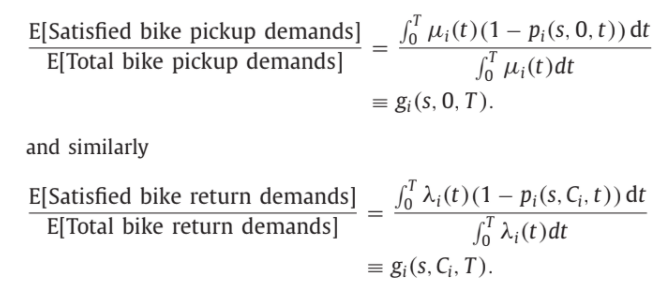

In [69]:
def e_satisfied(data,t,s,returnpickup) :
  c = int(data['upperbound'][(data['시간']==1)])
  if returnpickup == "pickup" :
    prob = mui(data,t)*(1-ps_cond(data,t,s,0))
  elif returnpickup == "return" : 
    prob = lambdai(data,t)*(1-ps_cond(data,t,s,c))
  return(prob)

# 현대고등학교 건너편 대여소로 확인 (최대거치용량 = 17)

In [72]:
data = df[(df['대여소번호']==2301)&(df['월']==5)].reset_index()
data.head()

,index,대여소명,대여소번호,월,시간,return_count,lambda15,rent_count,mu_15,upperbound
0,58190,현대고등학교 건너편,2301,5,0,2.645161,0.661290,2.000000,0.500000,17.0
1,58191,현대고등학교 건너편,2301,5,1,1.193548,0.298387,0.774194,0.193548,17.0
2,58192,현대고등학교 건너편,2301,5,2,0.806452,0.201613,0.806452,0.201613,17.0
3,58193,현대고등학교 건너편,2301,5,3,0.612903,0.153226,0.322581,0.080645,17.0
4,58194,현대고등학교 건너편,2301,5,4,0.193548,0.048387,0.225806,0.056452,17.0


In [73]:
# 8시 => smin = 2, smax = 16

answer = []
for s in range(int(data['upperbound'][(data['시간']==1)])+1):
    answer.append(e_satisfied(data,8,s,'return'))
print(answer)
print(sum(answer))

[0.3387096774193548, 0.3387096774193548, 0.3387096774193548, 0.3387096774193548, 0.3387096774193548, 0.3387096774193548, 0.3387096774193548, 0.33870967741935476, 0.33870967741934893, 0.3387096774189428, 0.3387096773937512, 0.3387096760262774, 0.3387096123891505, 0.33870714388646855, 0.33863050893835606, 0.3368448585030169, 0.30906669338586196, 0.09222346959698957]
5.818698414313003


In [74]:
# 18시 => smin = 3, smax = 15

answer = []
for s in range(int(data['upperbound'][(data['시간']==1)])+1):
    answer.append(e_satisfied(data,18,s,'return'))
print(answer)
print(sum(answer))

[3.8064515764925053, 3.8064514573365544, 3.806450865482772, 3.8064481996480026, 3.806436945540344, 3.8063925292611356, 3.8062293779113117, 3.805674464232231, 3.8039371297591877, 3.798964467298421, 3.786057080097239, 3.755966706582736, 3.6937116189060397, 3.581141390594892, 3.4069510114618757, 3.1836745456531017, 2.9608535456624128, 2.815914435686834]
65.2377073476076


In [75]:
# 8시 => smin = 2, smax = 16

answer = []
for s in range(int(data['upperbound'][(data['시간']==1)])+1):
    answer.append(e_satisfied(data,8,s,'pickup'))
print(answer)
print(sum(answer))

[0.013383904884823876, 0.09599084728058482, 0.12376901239773971, 0.12845634479050508, 0.1289844074798426, 0.12902905748636118, 0.1290320790225142, 0.12903224946016828, 0.12903225770215104, 0.12903225805093665, 0.12903225806405777, 0.12903225806450205, 0.12903225806451574, 0.1290322580645161, 0.12903225806451613, 0.12903225806451613, 0.12903225806451613, 0.12903225806451613]
2.168000483071283


In [76]:
# 18시 => smin = 3, smax = 15

answer = []
for s in range(int(data['upperbound'][(data['시간']==1)])+1):
    answer.append(e_satisfied(data,18,s,'pickup'))
print(answer)
print(sum(answer))

[2.3697975690915363, 2.5027607780309977, 2.7255817780216858, 2.9689685952543443, 3.1759504951245767, 3.3217600062180668, 3.4096604885611796, 3.4559729741426026, 3.4776282116895474, 3.4867224786090882, 3.4901859870904817, 3.4913918900227503, 3.4917783741782458, 3.4918930672804365, 3.4919247454655813, 3.4919329251501745, 3.491934904724712, 3.4919353391621777]
58.827780607818184


# 이디야 커피 수유역점 앞 대여소로 확인(최대거치용량 = 10)

In [78]:
data = df[(df['대여소번호']==1503)&(df['월']==5)].reset_index()
data.head()

,index,대여소명,대여소번호,월,시간,return_count,lambda15,rent_count,mu_15,upperbound
0,47597,이디야 커피 수유역점 앞,1503,5,0,2.032258,0.508065,1.870968,0.467742,10.0
1,47598,이디야 커피 수유역점 앞,1503,5,1,1.000000,0.250000,1.290323,0.322581,10.0
2,47599,이디야 커피 수유역점 앞,1503,5,2,1.612903,0.403226,1.451613,0.362903,10.0
3,47600,이디야 커피 수유역점 앞,1503,5,3,0.838710,0.209677,0.838710,0.209677,10.0
4,47601,이디야 커피 수유역점 앞,1503,5,4,0.516129,0.129032,0.645161,0.161290,10.0


In [79]:
# 8시 => smin = 2, smax = 9

answer = []
for s in range(int(data['upperbound'][(data['시간']==1)])+1):
    answer.append(e_satisfied(data,8,s,'return'))
print(answer)
print(sum(answer))

[1.3225806451604811, 1.3225806451383897, 1.322580644501465, 1.3225806282258807, 1.3225802639065947, 1.322573262484902, 1.3224608635399921, 1.3210117516054531, 1.3069058619688472, 1.214160020724989, 0.8995034494162824]
13.99951803667328


In [80]:
# 18시 => smin = 2, smax = 8

answer = []
for s in range(int(data['upperbound'][(data['시간']==1)])+1):
    answer.append(e_satisfied(data,18,s,'return'))
print(answer)
print(sum(answer))

[1.6853492721474652, 1.6849786873393862, 1.6835406417342755, 1.6787100982966914, 1.6643826381483855, 1.6274348181972391, 1.5463780556138145, 1.3996071243827777, 1.1900171421874213, 0.9721664046400776, 0.837490265862144]
15.970055148549678


In [81]:
# 8시 => smin = 2, smax = 9

answer = []
for s in range(int(data['upperbound'][(data['시간']==1)])+1):
    answer.append(e_satisfied(data,8,s,'pickup'))
print(answer)
print(sum(answer))

[0.05086796350989607, 0.12569483107721047, 0.21844067232106879, 0.27775774669038616, 0.30338254260844033, 0.3117404962431373, 0.3139297857720248, 0.31440883303985906, 0.3144988267230307, 0.31451363630600776, 0.31451579633081095]
2.8597511306218726


In [82]:
# 18시 => smin = 2, smax = 8

answer = []
for s in range(int(data['upperbound'][(data['시간']==1)])+1):
    answer.append(e_satisfied(data,18,s,'pickup'))
print(answer)
print(sum(answer))

[1.8306450876761835, 2.0297595703670037, 2.2476103079143477, 2.3893718169073233, 2.4565171237966825, 2.481598575752948, 2.4893314339335495, 2.4913596220911205, 2.4918221339066315, 2.491915263414066, 2.4919314960880046]
25.89186243184786


## Define Expected values of bike pickup/return demands
- Now we can calculate the expected values of bike pickup/return demands, expressed as e_satisfied
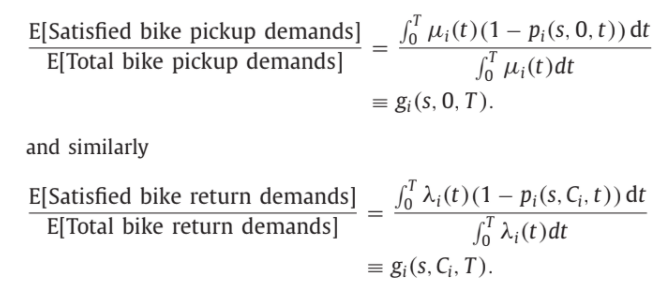

In [84]:
def lemma1(data,t,s,returnpickup) :
  bunja = 0
  bunmo = 0
  for time in range(t+1) : 
    bunja += e_satisfied(data,time,s,returnpickup)
    if returnpickup =='pickup' : 
      bunmo += mui(data,time)
    elif returnpickup =='return':
      bunmo += lambdai(data,time)
  
  if bunmo == 0 :
    return(0)
  else : 
    return(bunja/bunmo)

# 현대고등학교 건너편 대여소로 확인 (최대거치용량 = 17)

In [85]:
data = df[(df['대여소번호']==2301)&(df['월']==5)].reset_index()
data.head()

,index,대여소명,대여소번호,월,시간,return_count,lambda15,rent_count,mu_15,upperbound
0,58190,현대고등학교 건너편,2301,5,0,2.645161,0.661290,2.000000,0.500000,17.0
1,58191,현대고등학교 건너편,2301,5,1,1.193548,0.298387,0.774194,0.193548,17.0
2,58192,현대고등학교 건너편,2301,5,2,0.806452,0.201613,0.806452,0.201613,17.0
3,58193,현대고등학교 건너편,2301,5,3,0.612903,0.153226,0.322581,0.080645,17.0
4,58194,현대고등학교 건너편,2301,5,4,0.193548,0.048387,0.225806,0.056452,17.0


In [86]:
# 8시 => smin = 2, smax = 16
# g(s, c, t)

answer = []
for s in range(int(data['upperbound'][(data['시간']==1)])+1):
    answer.append(lemma1(data,8,s,'return'))
print(answer)
print(sum(answer))

[1.0, 1.0, 1.0, 0.9999999999999999, 0.9999999999999977, 0.9999999999999419, 0.9999999999985996, 0.999999999969005, 0.9999999993755083, 0.9999999886547198, 0.9999998162543415, 0.9999973828931114, 0.9999677348148158, 0.9996614430209274, 0.9970142964516323, 0.9777583353361099, 0.8562174936830786, 0.26641748801729687]
17.097033978469085


In [87]:
# 8시 => smin = 2, smax = 16
# g(s, 0, t)

answer = []
for s in range(int(data['upperbound'][(data['시간']==1)])+1):
    answer.append(lemma1(data,8,s,'pickup'))
print(answer)
print(sum(answer))

[0.18372038985618305, 0.7876102368043184, 0.9552527770153959, 0.9921566390276301, 0.9988493427290014, 0.9998574788464399, 0.999984888532528, 0.9999986072747028, 0.9999998868170018, 0.9999999917868504, 0.9999999994620874, 0.9999999999679119, 0.999999999998243, 0.999999999999911, 0.9999999999999956, 0.9999999999999997, 1.0, 1.0]
16.9174302381182


In [88]:
# 18시 => smin = 3, smax = 15
# g(s, c, t)

answer = []
for s in range(int(data['upperbound'][(data['시간']==1)])+1):
    answer.append(lemma1(data,18,s,'return'))
print(answer)
print(sum(answer))

[0.9999999980147397, 0.9999999913773602, 0.9999999577518753, 0.999999802207909, 0.9999991226997591, 0.9999963214218301, 0.9999854490346746, 0.9999458301660546, 0.9998107377764257, 0.9993815278009552, 0.9981178546379305, 0.9946947180288734, 0.9862405166384184, 0.9674122828239206, 0.9300057024682663, 0.8639060843869496, 0.7576830735423941, 0.599769476638853]
17.096948447417184


In [89]:
# 18시 => smin = 3, smax = 15
# g(s, 0, t)

answer = []
for s in range(int(data['upperbound'][(data['시간']==1)])+1):
    answer.append(lemma1(data,18,s,'pickup'))
print(answer)
print(sum(answer))

[0.5566136929185084, 0.7068623296408677, 0.823805542962362, 0.9024810742356184, 0.9504238459345355, 0.9768621147205276, 0.9900779987082637, 0.9960843033499095, 0.9985740869155917, 0.9995191939085564, 0.9998492803946366, 0.999955897383109, 0.9999879065518579, 0.9999968812085616, 0.9999992411122433, 0.9999998252324556, 0.9999999615932497, 0.999999990671672]
16.90109316744253


# 이디야 커피 수유역점 앞 대여소로 확인(최대거치용량 = 10)

In [90]:
data = df[(df['대여소번호']==1503)&(df['월']==5)].reset_index()
data.head()

,index,대여소명,대여소번호,월,시간,return_count,lambda15,rent_count,mu_15,upperbound
0,47597,이디야 커피 수유역점 앞,1503,5,0,2.032258,0.508065,1.870968,0.467742,10.0
1,47598,이디야 커피 수유역점 앞,1503,5,1,1.000000,0.250000,1.290323,0.322581,10.0
2,47599,이디야 커피 수유역점 앞,1503,5,2,1.612903,0.403226,1.451613,0.362903,10.0
3,47600,이디야 커피 수유역점 앞,1503,5,3,0.838710,0.209677,0.838710,0.209677,10.0
4,47601,이디야 커피 수유역점 앞,1503,5,4,0.516129,0.129032,0.645161,0.161290,10.0


In [91]:
# 8시 => smin = 2, smax = 9
# g(s, c, t)

answer = []
for s in range(int(data['upperbound'][(data['시간']==1)])+1):
    answer.append(lemma1(data,8,s,'return'))
print(answer)
print(sum(answer))

[0.9999999999915952, 0.9999999998207805, 0.9999999963513698, 0.9999999328195892, 0.9999988933767633, 0.9999839208813933, 0.9997977586123385, 0.997851533611021, 0.9813240415264338, 0.8735324800260449, 0.4280134883772342]
10.280502045394563


In [92]:
# 18시 => smin = 2, smax = 8
# g(s, 0, t)

answer = []
for s in range(int(data['upperbound'][(data['시간']==1)])+1):
    answer.append(lemma1(data,8,s,'pickup'))
print(answer)
print(sum(answer))

[0.2106050156554556, 0.7258065961149558, 0.9209534007643588, 0.9780972848444142, 0.9942937238571231, 0.9986647265162247, 0.999725046230307, 0.99995019715933, 0.9999920017530014, 0.999998849608797, 0.9999998465625315]
9.828086689066499


In [93]:
# 8시 => smin = 2, smax = 9
# g(s, c, t)

answer = []
for s in range(int(data['upperbound'][(data['시간']==1)])+1):
    answer.append(lemma1(data,18,s,'return'))
print(answer)
print(sum(answer))

[0.9999913647386854, 0.9999669758735314, 0.9998688937776204, 0.9995189474311987, 0.9983736938440165, 0.9949207041117304, 0.9852917317895233, 0.960399145162985, 0.9005656964721737, 0.7664342545684507, 0.5145918213117239]
10.11992322908164


In [94]:
# 18시 => smin = 2, smax = 8
# g(s, 0, t)

answer = []
for s in range(int(data['upperbound'][(data['시간']==1)])+1):
    answer.append(lemma1(data,18,s,'pickup'))
print(answer)
print(sum(answer))

[0.4675325429782123, 0.6918622883216939, 0.8607779751213853, 0.9482324261925417, 0.9837290405632249, 0.9955861116067575, 0.9989490234102498, 0.99977733280335, 0.9999575495217319, 0.999992627134174, 0.9999986648153016]
9.946395582468623


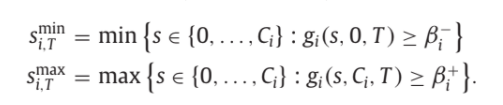

In [96]:
def sminmax(i,month,t, beta) : 
  L1=[]
  L2=[]
  data = df[(df['대여소번호']==i)&(df['월']==month)].reset_index()
  c = int(data['upperbound'][(data['시간']==1)])
  for a in range(c+1) : 
    if lemma1(data,t,a,"pickup") >= beta :
      L1.append(a)
    if lemma1(data,t,a,"return") >= beta : 
      L2.append(a)
  
  if len(L1) == 0 : 
    a = '값없음'
  elif len(L1) > 0 :
    a = min(L1)
  if len(L2) == 0 : 
    b = '값없음'
  elif len(L2) > 0 :
    b = max(L2)
  return(a,b)

# 현대고등학교 건너편 대여소로 확인 (최대거치용량 = 17)

In [97]:
%%time

# 현대고등학교 건너편 대여소 번호 = 2301(고정), 월 = 5(고정), 시간(t) = 0 ~ 23, 베타 = 0.85(고정)

answer2 = []
for j in range(0, 24):
    answer2.append(sminmax(2301,5,j,0.85))
answer2

Wall time: 23.3 s


[(2, 15),
 (2, 15),
 (2, 15),
 (2, 15),
 (2, 15),
 (2, 15),
 (2, 15),
 (2, 15),
 (2, 16),
 (2, 15),
 (2, 15),
 (2, 15),
 (2, 15),
 (2, 15),
 (2, 15),
 (2, 15),
 (2, 15),
 (3, 15),
 (3, 15),
 (3, 15),
 (3, 15),
 (3, 15),
 (3, 15),
 (3, 15)]

# 이디야 커피 수유역점 앞 대여소로 확인(최대거치용량 = 10)

In [98]:
%%time

# 이디야 커피 수유역점 앞 대여소 번호 = 1503(고정), 월 = 5(고정), 시간(t) = 0 ~ 23, 베타 = 0.85(고정)

answer1 = []
for j in range(0, 24):
    answer1.append(sminmax(1503,5,j,0.85))
answer1

Wall time: 13.8 s


[(2, 8),
 (2, 8),
 (2, 8),
 (2, 8),
 (2, 8),
 (2, 8),
 (2, 8),
 (2, 9),
 (2, 9),
 (2, 9),
 (2, 9),
 (2, 9),
 (2, 9),
 (2, 8),
 (2, 8),
 (2, 8),
 (2, 8),
 (2, 8),
 (2, 8),
 (2, 8),
 (2, 8),
 (2, 8),
 (2, 8),
 (2, 8)]